<a href="https://colab.research.google.com/github/SarahAyur/SarahAyur/blob/main/Sentiment_Analyst_Goers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [ ]:
import os
import pandas as pd

# Cek direktori kerja saat ini
print("Direktori kerja saat ini:", os.getcwd())

# Tentukan nama file
filename = r"ReviewGoers.csv"

try:
    df = pd.read_csv(filename, encoding='latin-1')
    print(df.head())
except FileNotFoundError:
    print(f"File '{filename}' tidak ditemukan. Pastikan jalur dan nama file benar.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

Direktori kerja saat ini: /content
                                          Unnamed: 0 Unnamed: 1
0                                                NaN        NaN
1                                            Ulasan     Rating 
2  Aku sangat seneng bgt bisa tau apk goers krna ...          5
3  Aplikasi goers lebih memudahkan kita untuk mem...          5
4  Aplikasi goers lebih memudahkan kita untuk mem...          5


In [ ]:
import pandas as pd

# Membaca file CSV tanpa header
df = pd.read_csv("ReviewGoers.csv", header=None, encoding='latin-1')

# Menampilkan isi DataFrame
print("DataFrame awal:")
print(df.head())

# Menetapkan nama kolom secara manual
df.columns = ['Ulasan', 'Rating']  # Ganti sesuai dengan kolom yang ada

# Menampilkan DataFrame dengan nama kolom baru
print("DataFrame dengan nama kolom baru:")
print(df.head())

# Mengakses kolom 'Ulasan'
try:
    reviews = df['Ulasan']
    print("Ulasan:")
    print(reviews.head())
except KeyError:
    print("Kolom 'Ulasan' tidak ditemukan.")

DataFrame awal:
                                                   0        1
0                                                NaN      NaN
1                                                NaN      NaN
2                                            Ulasan   Rating 
3  Aku sangat seneng bgt bisa tau apk goers krna ...        5
4  Aplikasi goers lebih memudahkan kita untuk mem...        5
DataFrame dengan nama kolom baru:
                                              Ulasan   Rating
0                                                NaN      NaN
1                                                NaN      NaN
2                                            Ulasan   Rating 
3  Aku sangat seneng bgt bisa tau apk goers krna ...        5
4  Aplikasi goers lebih memudahkan kita untuk mem...        5
Ulasan:
0                                                  NaN
1                                                  NaN
2                                              Ulasan 
3    Aku sangat seneng bgt bisa t

In [ ]:
import pandas as pd
import string

# Fungsi untuk menghitung tanda baca
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(" ")), 3) * 100 if len(text) > 0 else 0

# Membaca file CSV tanpa header
df = pd.read_csv("ReviewGoers.csv", header=None, encoding='latin-1')
df.columns = ['Ulasan', 'Rating']  # Menetapkan nama kolom

# Memeriksa jumlah nilai kosong
print("Jumlah nilai kosong di kolom 'Ulasan':", df['Ulasan'].isnull().sum())

# Mengisi NaN dengan string kosong
df['Ulasan'] = df['Ulasan'].fillna("")

# Menghitung panjang review dan menghitung tanda baca
df['Review_len'] = df['Ulasan'].apply(lambda x: len(x) - x.count(" "))

# Menampilkan DataFrame
print(df.head())

Jumlah nilai kosong di kolom 'Ulasan': 2
                                              Ulasan   Rating  Review_len
0                                                         NaN           0
1                                                         NaN           0
2                                            Ulasan   Rating            6
3  Aku sangat seneng bgt bisa tau apk goers krna ...        5         191
4  Aplikasi goers lebih memudahkan kita untuk mem...        5          81


In [ ]:
import pandas as pd
import re

# Membaca file CSV tanpa header
df = pd.read_csv("ReviewGoers.csv", header=None, encoding='latin-1')
df.columns = ['Ulasan', 'Rating']  # Menetapkan nama kolom

# Mengisi NaN dengan string kosong
df['Ulasan'] = df['Ulasan'].fillna("")

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    return text.lower()  # Mengubah menjadi huruf kecil

# Menerapkan fungsi untuk membuat kolom 'cleaned_text'
df['cleaned_text'] = df['Ulasan'].apply(clean_text)

# Mengakses kolom 'cleaned_text'
print("Isi kolom 'cleaned_text':")
print(df['cleaned_text'].head())

Isi kolom 'cleaned_text':
0                                                     
1                                                     
2                                              ulasan 
3    aku sangat seneng bgt bisa tau apk goers krna ...
4    aplikasi goers lebih memudahkan kita untuk mem...
Name: cleaned_text, dtype: object


In [ ]:
import pandas as pd
import re

# Membaca file CSV tanpa header
df = pd.read_csv("ReviewGoers.csv", header=None, encoding='latin-1')
df.columns = ['Ulasan', 'Rating']  # Menetapkan nama kolom

# Mengisi NaN dengan string kosong
df['Ulasan'] = df['Ulasan'].fillna("")

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    return text.lower()  # Mengubah menjadi huruf kecil

# Menerapkan fungsi untuk membuat kolom 'cleaned_text'
df['cleaned_text'] = df['Ulasan'].apply(clean_text)

# Fungsi untuk memecah teks menjadi token
def tokenize(text):
    return text.split()  # Memisahkan kata berdasarkan spasi

# Membuat kolom 'tokens'
df['tokens'] = df['cleaned_text'].apply(tokenize)

# Mengakses kolom 'tokens'
print("Isi kolom 'tokens':")
print(df['tokens'].head())
df.head()

Isi kolom 'tokens':
0                                                   []
1                                                   []
2                                             [ulasan]
3    [aku, sangat, seneng, bgt, bisa, tau, apk, goe...
4    [aplikasi, goers, lebih, memudahkan, kita, unt...
Name: tokens, dtype: object


,Ulasan,Rating,cleaned_text,tokens
0,,NaN,,[]
1,,NaN,,[]
2,Ulasan,Rating,ulasan,[ulasan]
3,Aku sangat seneng bgt bisa tau apk goers krna ...,5,aku sangat seneng bgt bisa tau apk goers krna ...,"[aku, sangat, seneng, bgt, bisa, tau, apk, goe..."
4,Aplikasi goers lebih memudahkan kita untuk mem...,5,aplikasi goers lebih memudahkan kita untuk mem...,"[aplikasi, goers, lebih, memudahkan, kita, unt..."


In [ ]:
import pandas as pd

# Membaca file CSV tanpa header
df = pd.read_csv("ReviewGoers.csv", header=None, encoding='latin-1')

# Menampilkan jumlah kolom yang ada
print("Jumlah kolom dalam DataFrame:", df.shape[1])

# Menetapkan nama kolom yang sesuai
if df.shape[1] == 2:
    df.columns = ['Ulasan', 'Rating']  # Jika hanya ada 2 kolom
else:
    print("Jumlah kolom tidak sesuai. Sesuaikan nama kolom sesuai dengan jumlah kolom yang ada.")

# Menampilkan beberapa baris pertama
print("Beberapa baris pertama dari DataFrame:")
print(df.head())

Jumlah kolom dalam DataFrame: 2
Beberapa baris pertama dari DataFrame:
                                              Ulasan   Rating
0                                                NaN      NaN
1                                                NaN      NaN
2                                            Ulasan   Rating 
3  Aku sangat seneng bgt bisa tau apk goers krna ...        5
4  Aplikasi goers lebih memudahkan kita untuk mem...        5


In [ ]:
import pandas as pd

# Membaca file CSV tanpa header
df = pd.read_csv("ReviewGoers.csv", header=None, encoding='latin-1')
df.columns = ['Ulasan', 'Rating']  # Menetapkan nama kolom

# Menampilkan beberapa baris pertama
print("Beberapa baris pertama dari DataFrame:")
print(df.head())

# Menampilkan nilai unik di kolom Rating
print("Nilai unik di kolom Rating:")
print(df['Rating'].unique())

# Memeriksa tipe data kolom Rating
print("Tipe data kolom Rating:", df['Rating'].dtype)

# Memeriksa jumlah nilai kosong di kolom Rating
print("Jumlah nilai kosong di kolom Rating:", df['Rating'].isnull().sum())

# Mengonversi kolom Rating ke float
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Menghapus baris yang memiliki NaN di kolom Rating
df = df.dropna(subset=['Rating'])

# Menghitung jumlah baris untuk setiap rating
rating_counts = df['Rating'].value_counts().sort_index()
print("Jumlah baris untuk setiap rating setelah pembersihan:")
print(rating_counts)

Beberapa baris pertama dari DataFrame:
                                              Ulasan   Rating
0                                                NaN      NaN
1                                                NaN      NaN
2                                            Ulasan   Rating 
3  Aku sangat seneng bgt bisa tau apk goers krna ...        5
4  Aplikasi goers lebih memudahkan kita untuk mem...        5
Nilai unik di kolom Rating:
[nan 'Rating ' '5' '1' '4' '3' '2']
Tipe data kolom Rating: object
Jumlah nilai kosong di kolom Rating: 2
Jumlah baris untuk setiap rating setelah pembersihan:
Rating
1.0    61
2.0    23
3.0    20
4.0    60
5.0    93
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Membaca file CSV tanpa header
df = pd.read_csv("ReviewGoers.csv", header=None, encoding='latin-1')
df.columns = ['Ulasan', 'Rating']  # Menetapkan nama kolom yang sesuai

# Menampilkan nama kolom
print("Nama kolom dalam DataFrame:", df.columns.tolist())

# Menampilkan beberapa baris pertama
print("Beberapa baris pertama dari DataFrame:")
print(df.head())



Nama kolom dalam DataFrame: ['Ulasan', 'Rating']
Beberapa baris pertama dari DataFrame:
                                              Ulasan   Rating
0                                                NaN      NaN
1                                                NaN      NaN
2                                            Ulasan   Rating 
3  Aku sangat seneng bgt bisa tau apk goers krna ...        5
4  Aplikasi goers lebih memudahkan kita untuk mem...        5


Number of null in label: 2
Number of null in text: 2


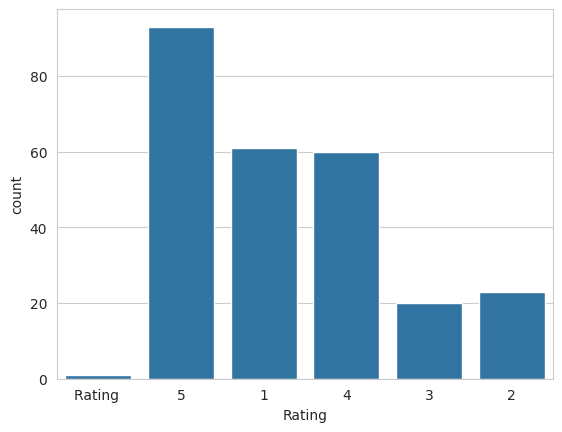

In [ ]:
print(f"Number of null in label: { df['Ulasan'].isnull().sum() }")
print(f"Number of null in text: { df['Rating'].isnull().sum()}")
sns.countplot(x='Rating', data=df);

In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Pastikan untuk mengunduh paket yang diperlukan
nltk.download('wordnet')
nltk.download('punkt')

# Membaca file CSV
df = pd.read_csv("ReviewGoers.csv", header=None, encoding='latin-1')
df.columns = ['Ulasan', 'Rating']  # Menetapkan nama kolom

# Mengganti nilai non-string dengan string kosong
df['Ulasan'] = df['Ulasan'].fillna('').astype(str)

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Fungsi untuk lemmatize teks
def lemmatize_text(text):
    words = nltk.word_tokenize(text)  # Tokenisasi
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

# Membuat kolom 'lemmatized_review'
df['lemmatized_review'] = df['Ulasan'].apply(lemmatize_text)

# Memeriksa kolom yang baru dibuat
print("Beberapa baris dari kolom 'lemmatized_review':")
print(df['lemmatized_review'].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Beberapa baris dari kolom 'lemmatized_review':
0                                                     
1                                                     
2                                               Ulasan
3    Aku sangat seneng bgt bisa tau apk goer krna a...
4    Aplikasi goer lebih memudahkan kita untuk memb...
Name: lemmatized_review, dtype: object


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


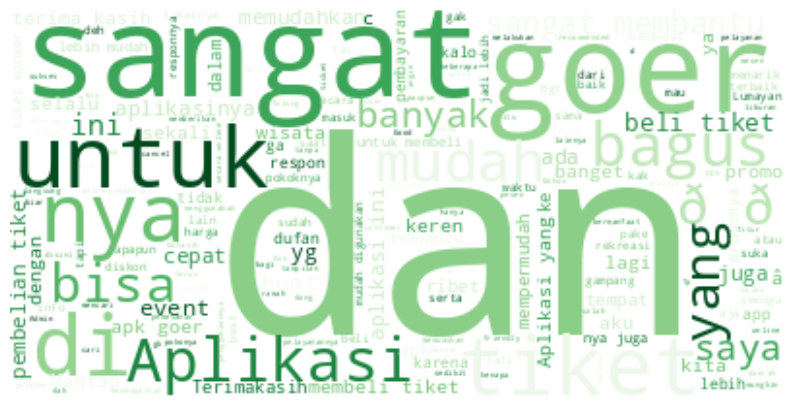

In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unduh paket yang diperlukan
nltk.download('wordnet')
nltk.download('punkt')

# Membaca file CSV
df = pd.read_csv("ReviewGoers.csv", header=None, encoding='latin-1')
df.columns = ['Ulasan', 'Rating']  # Menetapkan nama kolom

# Mengganti nilai non-string dengan string kosong
df['Ulasan'] = df['Ulasan'].fillna('').astype(str)

# Konversi kolom 'Rating' menjadi numerik
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Mengganti NaN dengan 0 (jika diperlukan)
df['Rating'].fillna(0, inplace=True)

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Fungsi untuk lemmatize teks
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

# Membuat kolom 'lemmatized_review'
df['lemmatized_review'] = df['Ulasan'].apply(lemmatize_text)

# Membuat variabel filtered_positive
filtered_positive = ' '.join(df[df['Rating'] >= 4]['lemmatized_review'])

# Membuat word cloud dari filtered_positive
wordcloud = WordCloud(max_font_size=140, margin=0, background_color="white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


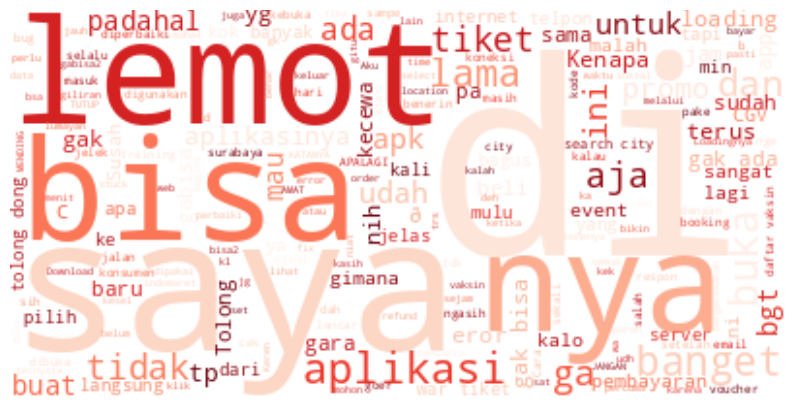

In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unduh paket yang diperlukan
nltk.download('wordnet')
nltk.download('punkt')

# Membaca file CSV
df = pd.read_csv("ReviewGoers.csv", header=None, encoding='latin-1')
df.columns = ['Ulasan', 'Rating']  # Menetapkan nama kolom

# Mengganti nilai non-string dengan string kosong
df['Ulasan'] = df['Ulasan'].fillna('').astype(str)

# Konversi kolom 'Rating' menjadi numerik
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Mengganti NaN dengan 0 (jika diperlukan)
df['Rating'].fillna(0, inplace=True)

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Fungsi untuk lemmatize teks
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

# Membuat kolom 'lemmatized_review'
df['lemmatized_review'] = df['Ulasan'].apply(lemmatize_text)

# Membuat variabel filtered_positive
filtered_positive = ' '.join(df[df['Rating'] >= 4]['lemmatized_review'])

# Membuat variabel filtered_negative
filtered_negative = ' '.join(df[df['Rating'] < 4]['lemmatized_review'])

# Membuat word cloud dari filtered_negative
wordcloud = WordCloud(max_font_size=140, margin=0, background_color="white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unduh paket yang diperlukan
nltk.download('wordnet')
nltk.download('punkt')

# Membaca file CSV
df = pd.read_csv("ReviewGoers.csv", header=None, encoding='latin-1')
df.columns = ['Ulasan', 'Rating']  # Menetapkan nama kolom

# Mengganti nilai non-string dengan string kosong
df['Ulasan'] = df['Ulasan'].fillna('').astype(str)

# Konversi kolom 'Rating' menjadi numerik
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'].fillna(0, inplace=True)

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Fungsi untuk lemmatize teks
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

# Membuat kolom 'lemmatized_review'
df['lemmatized_review'] = df['Ulasan'].apply(lemmatize_text)

# Menambahkan kolom untuk panjang ulasan
df['Review_len'] = df['Ulasan'].apply(len)

# Menambahkan kolom untuk menghitung tanda baca
df['punct'] = df['Ulasan'].apply(lambda x: sum(1 for char in x if char in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'))

# Membuat variabel X dan y
X = df[['lemmatized_review', 'Review_len', 'punct']]
y = df['Rating']  # Atau ganti dengan kolom label lain yang sesuai

print(X.shape)
print(y.shape)

(260, 3)
(260,)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Unduh paket yang diperlukan
nltk.download('wordnet')
nltk.download('punkt')

# Membaca file CSV
df = pd.read_csv("ReviewGoers.csv", header=None, encoding='latin-1')
df.columns = ['Ulasan', 'Rating']  # Menetapkan nama kolom

# Mengganti nilai non-string dengan string kosong
df['Ulasan'] = df['Ulasan'].fillna('').astype(str)

# Konversi kolom 'Rating' menjadi numerik
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'].fillna(0, inplace=True)

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Fungsi untuk lemmatize teks
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

# Membuat kolom 'lemmatized_review'
df['lemmatized_review'] = df['Ulasan'].apply(lemmatize_text)

# Membagi data menjadi set pelatihan dan pengujian
X = df['lemmatized_review']
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan CountVectorizer untuk representasi teks
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Melatih model Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)

# Memprediksi dan mengevaluasi model
naive_bayes_pred = classifier.predict(X_test_vect)
accuracy = accuracy_score(y_test, naive_bayes_pred)
print(f'Akurasi: {accuracy:.2f}')

Akurasi: 0.54


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


              precision    recall  f1-score   support

         1.0       0.73      0.69      0.71        16
         2.0       0.25      0.20      0.22         5
         3.0       0.00      0.00      0.00         4
         4.0       0.25      0.08      0.12        12
         5.0       0.54      1.00      0.70        15

    accuracy                           0.54        52
   macro avg       0.35      0.39      0.35        52
weighted avg       0.46      0.54      0.47        52



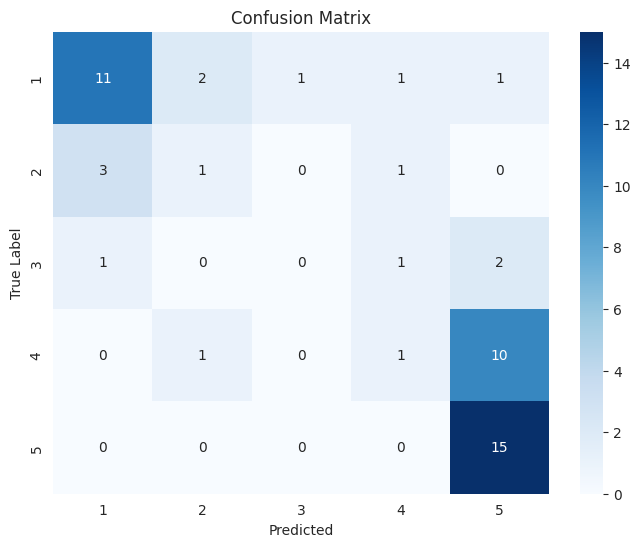

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Memprediksi dan mengevaluasi model
naive_bayes_pred = classifier.predict(X_test_vect)

# Laporan klasifikasi
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_labels = [1,2,3,4,5]  # Sesuaikan dengan kelas yang ada di data Anda
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_labels, columns=class_labels)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.show()

In [ ]:
import pandas as pd
import nltk

# Unduh paket yang diperlukan
nltk.download('wordnet')
nltk.download('punkt')

# Membaca file CSV
df = pd.read_csv("ReviewGoers.csv", header=None, encoding='latin-1')
df.columns = ['Ulasan', 'Rating']  # Menetapkan nama kolom

# Mengganti nilai non-string dengan string kosong
df['Ulasan'] = df['Ulasan'].fillna('').astype(str)

# Konversi kolom 'Rating' menjadi numerik
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'].fillna(0, inplace=True)

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Fungsi untuk lemmatize teks
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

# Membuat kolom 'lemmatized_review'
df['lemmatized_review'] = df['Ulasan'].apply(lemmatize_text)

# Membagi data menjadi set pelatihan dan pengujian
X = df['lemmatized_review']
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan CountVectorizer untuk representasi teks
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Melatih beberapa model
models = [
    MultinomialNB(),
    LogisticRegression(),
    RandomForestClassifier(n_estimators=150),
    SVC(kernel='linear')
]

# Menerapkan pelatihan dan evaluasi untuk setiap model
for model in models:
    model.fit(X_train_vect, y_train)
    predictions = model.predict(X_test_vect)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Akurasi {model.__class__.__name__}: {accuracy:.2f}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Akurasi MultinomialNB: 0.54
Akurasi LogisticRegression: 0.50
Akurasi RandomForestClassifier: 0.42
Akurasi SVC: 0.48


In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Unduh paket yang diperlukan
nltk.download('wordnet')
nltk.download('punkt')

# Membaca file CSV
df = pd.read_csv("ReviewGoers.csv", header=None, encoding='latin-1')
df.columns = ['Ulasan', 'Rating']  # Menetapkan nama kolom

# Mengganti nilai non-string dengan string kosong
df['Ulasan'] = df['Ulasan'].fillna('').astype(str)

# Konversi kolom 'Rating' menjadi numerik
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'].fillna(0, inplace=True)

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Fungsi untuk lemmatize teks
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

# Membuat kolom 'lemmatized_review'
df['lemmatized_review'] = df['Ulasan'].apply(lemmatize_text)

# Membagi data menjadi set pelatihan dan pengujian
X = df['lemmatized_review']
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan TfidfVectorizer untuk representasi teks
tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

# Melatih model SVC
classifier = SVC(kernel='linear', random_state=10)
classifier.fit(tfidf_train, y_train)

# Memprediksi akurasi
accuracy = classifier.score(tfidf_test, y_test)
print(f'Akurasi: {accuracy:.2f}')

# Memprediksi data baru
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = tfidf.transform(data).toarray()  # Pastikan transformasi sesuai

my_pred = classifier.predict(vect)
print(my_pred)  # Output: [0 1 0 1]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Akurasi: 0.56
[5. 5. 5. 5.]
